# Ensemble Learning Implementation

#### Reference: https://www.youtube.com/watch?v=CDewPfLV4Tc  (Ensemble Learning Tutorial)

### Bagging

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

In [2]:
data = load_iris()

In [3]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
d = {
    'sepal length (cm)':data.data[50:, 1],
    'petal length (cm)': data.data[50:, 2],
    'Species': np.array([i for i in data.target if i > 0])
}

In [6]:
d

{'sepal length (cm)': array([3.2, 3.2, 3.1, 2.3, 2.8, 2.8, 3.3, 2.4, 2.9, 2.7, 2. , 3. , 2.2,
        2.9, 2.9, 3.1, 3. , 2.7, 2.2, 2.5, 3.2, 2.8, 2.5, 2.8, 2.9, 3. ,
        2.8, 3. , 2.9, 2.6, 2.4, 2.4, 2.7, 2.7, 3. , 3.4, 3.1, 2.3, 3. ,
        2.5, 2.6, 3. , 2.6, 2.3, 2.7, 3. , 2.9, 2.9, 2.5, 2.8, 3.3, 2.7,
        3. , 2.9, 3. , 3. , 2.5, 2.9, 2.5, 3.6, 3.2, 2.7, 3. , 2.5, 2.8,
        3.2, 3. , 3.8, 2.6, 2.2, 3.2, 2.8, 2.8, 2.7, 3.3, 3.2, 2.8, 3. ,
        2.8, 3. , 2.8, 3.8, 2.8, 2.8, 2.6, 3. , 3.4, 3.1, 3. , 3.1, 3.1,
        3.1, 2.7, 3.2, 3.3, 3. , 2.5, 3. , 3.4, 3. ]),
 'petal length (cm)': array([4.7, 4.5, 4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. ,
        4.7, 3.6, 4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4,
        4.8, 5. , 4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1,
        4. , 4.4, 4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1, 6. , 5.1,
        5.9, 5.6, 5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5. , 5.1,
        5.3, 5.5, 6.7, 6.9,

In [7]:
df = pd.DataFrame(d)
df

,sepal length (cm),petal length (cm),Species
0,3.2,4.7,1
1,3.2,4.5,1
2,3.1,4.9,1
3,2.3,4.0,1
4,2.8,4.6,1
...,...,...,...
95,3.0,5.2,2
96,2.5,5.0,2
97,3.0,5.2,2
98,3.4,5.4,2


In [8]:
# randomize the data with shuffle

df = df.sample(df.shape[0])

In [9]:
df

,sepal length (cm),petal length (cm),Species
17,2.7,4.1,1
31,2.4,3.7,1
51,2.7,5.1,2
62,3.0,5.5,2
37,2.3,4.4,1
...,...,...,...
82,2.8,5.6,2
71,2.8,4.9,2
58,2.5,5.8,2
91,3.1,5.1,2


In [10]:
df_train = df.iloc[:60, :].sample(10)
df_test = df.iloc[:61, :].sample(10)

In [11]:
df_tt = df_test.sample(5, replace = True)
X_test = df_tt.iloc[:, :-1].values
y_test = df_tt.iloc[:, -1].values

In [12]:
# models -> Random Samples!

def evaluate(model, X, y):
    model.fit(X,y)
    plot_tree(model)
    
    plt.show()
    plot_decision_regions(X,y,model,legend=2)
    plt.show()
    
    y_pred = model.predict(X_test)
    print("y_test: ", y_test)
    print("y_pred: ", y_pred)
    print("accuracy score", accuracy_score(y_test, y_pred)*100)
    
    return model

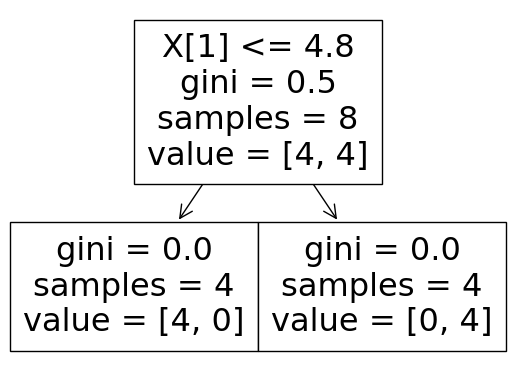

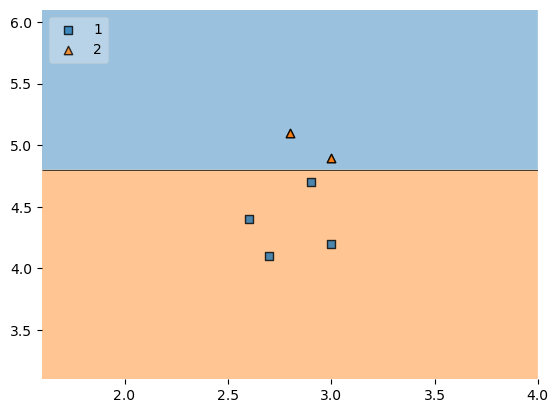

y_test:  [1 2 2 2 1]
y_pred:  [1 2 2 2 1]
accuracy score 100.0


In [13]:
# first tree

df_t = df_train.sample(8, replace=True)
X_train = df_t.iloc[:, :-1].values
y_train = df_t.iloc[:, -1].values

dt = DecisionTreeClassifier()
bag1 = evaluate (dt, X_train, y_train)

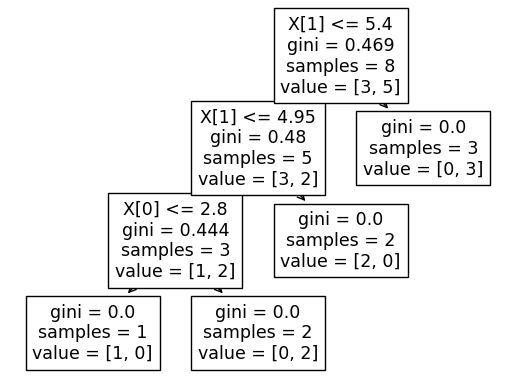

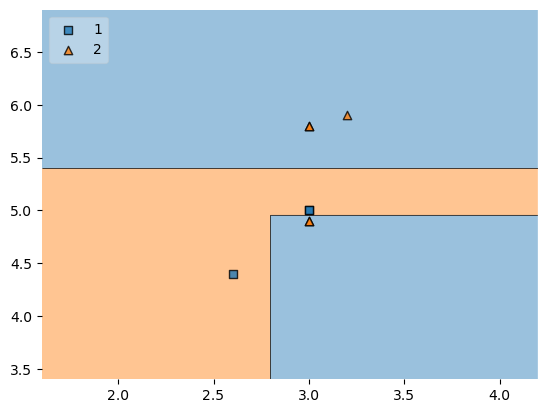

y_test:  [1 2 2 2 1]
y_pred:  [1 2 1 2 1]
accuracy score 80.0


In [14]:
# second tree

df_t = df_train.sample(8, replace=True)
X_train = df_t.iloc[:, :-1].values
y_train = df_t.iloc[:, -1].values

dt = DecisionTreeClassifier()
bag2 = evaluate (dt, X_train, y_train)

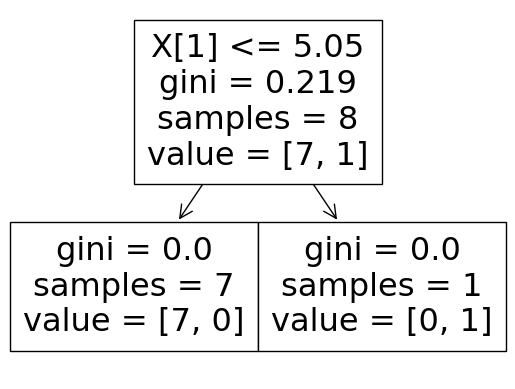

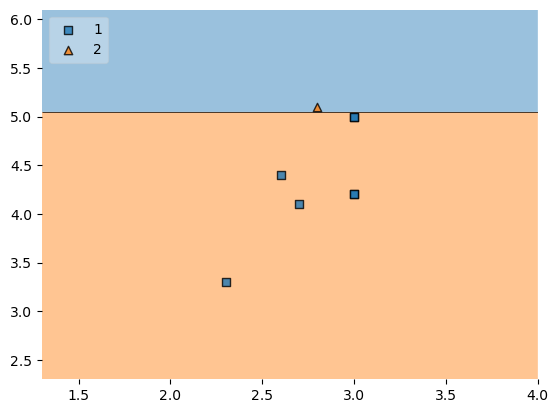

y_test:  [1 2 2 2 1]
y_pred:  [1 1 2 1 1]
accuracy score 60.0


In [15]:
# third tree

df_t = df_train.sample(8, replace=True)
X_train = df_t.iloc[:, :-1].values
y_train = df_t.iloc[:, -1].values

dt = DecisionTreeClassifier()
bag3 = evaluate (dt, X_train, y_train)

In [16]:
# Aggregation 

print("prediction 1", bag1.predict(np.array([2.5, 4.9]).reshape(1,2)))
print("prediction 2", bag2.predict(np.array([2.5, 4.9]).reshape(1,2)))
print("prediction 3", bag3.predict(np.array([2.5, 4.9]).reshape(1,2)))

prediction 1 [2]
prediction 2 [1]
prediction 3 [1]


### Voting/Stacking

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [21]:
m1 = KNeighborsClassifier()
m2 = LogisticRegression()
m3 = MultinomialNB()
m4 = GaussianNB()
m5 = DecisionTreeClassifier()

In [22]:
from sklearn.ensemble import VotingClassifier

In [23]:
model = VotingClassifier([('km', m1), ('lr', m2), ('mn', m3), ('gn', m4), ('dt', m5)])

In [26]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1].values, df.iloc[:, -1].values, test_size = 0.33, random_state = 1)

In [27]:
model.fit(X_train, y_train)

VotingClassifier(estimators=[('km', KNeighborsClassifier()),
                             ('lr', LogisticRegression()),
                             ('mn', MultinomialNB()), ('gn', GaussianNB()),
                             ('dt', DecisionTreeClassifier())])

In [30]:
model.score(X_train, y_train)*100

C:\Users\Jessie Lee\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


94.02985074626866

In [32]:
model.score(X_test, y_test)*100

C:\Users\Jessie Lee\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


87.87878787878788

### Boosting

In [33]:
from sklearn.ensemble import AdaBoostClassifier

In [35]:
abc = AdaBoostClassifier(n_estimators=4, random_state = 0)
abc.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=4, random_state=0)

In [36]:
y_pred = abc.predict(X_test)

In [37]:
abc.score(X_test, y_test)

0.8787878787878788

In [40]:
accuracy_score(y_test, y_pred)*100

87.87878787878788